## Week2 授業課題1 二次元配列と勾配問題
械学習においては関数の最小値を見つけることが重要になってきます。そのために使われるのが勾配降下法です。
この課題では勾配降下法を理解する準備として、NumPyを用いて関数の勾配を考えていきます。

### 【問題1】1次関数
xが-50から50の範囲で次の式を考えます。

$
y=\frac{1}{2}x+1
$

1
-50から50まで0.1間隔のxを表すndarrayと、各要素に対するyを表すndarrayを作成してください。

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
step1 = 0.1 # ステップ幅を0.1で設定
x_ndarray1 = np.arange(-50, 50+step1, step1) # xのndarrayを作成
y_ndarray1 = 0.5*x_ndarray1 + 1 # yのndarrayを作成
print(x_ndarray1)
print(y_ndarray1)

[-50.  -49.9 -49.8 ...  49.8  49.9  50. ]
[-24.   -23.95 -23.9  ...  25.9   25.95  26.  ]


＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿
### 【問題2】配列の結合
問題1で作成したndarrayを結合し、(1001, 2)の形の配列にしてください。0列目にx、1列目にyが来るようにします。

In [3]:
xy_ndarray = np.concatenate([x_ndarray1[:, np.newaxis], y_ndarray1[:, np.newaxis]], axis=1) # x, yのndarrayを連結
print(xy_ndarray)
print(xy_ndarray.shape) # 連結した配列の形を確認

[[-50.   -24.  ]
 [-49.9  -23.95]
 [-49.8  -23.9 ]
 ...
 [ 49.8   25.9 ]
 [ 49.9   25.95]
 [ 50.    26.  ]]
(1001, 2)


＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿
### 【問題3】勾配を求める
各x座標における勾配を求めます。ここで勾配はyの変化量をxの変化量で割ることで計算します。

$
\large
勾配=\frac{yの変化量}{xの変化量}
$

各変化量は以下の図のように隣同士の要素の差から近似的に求めます。
<img src="398d8c5b4b1bd4151dea6488059226a1.png">
注意


- 厳密に各点における勾配を求めるには極限（微分）を利用する必要があります
- 勾配はx座標の間隔を使うので、xの要素数に対して一つ少なくなります

In [4]:
gradient1 =  (y_ndarray1[1:] - y_ndarray1[:-1]) / (x_ndarray1[1:] - x_ndarray1[:-1]) # 勾配を求める
gradient1

array([0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.

＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿
### 【問題4】グラフを描く
1次関数のグラフをMatplotlibを用いて描いてください。また、それとは別に横軸をx、縦軸を勾配としたグラフも描いてください。
matplotlib.pyplot.plot — Matplotlib 3.1.0 documentation

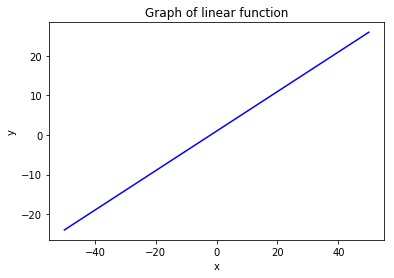

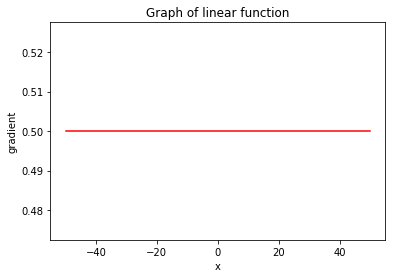

In [5]:
# x, yの一次関数のグラフを描画
plt.title("Graph of linear function")
plt.xlabel("x")
plt.ylabel("y")
plt.plot(x_ndarray1, y_ndarray1, color="b")
plt.show()

# 横軸をx、縦軸を勾配にしたグラフを描画
plt.title("Graph of linear function")
plt.xlabel("x")
plt.ylabel("gradient")
plt.plot(x_ndarray1[1:], gradient1, color="r")
plt.show()

＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿
### 【問題5】Pythonの関数化
問題1から問題3までの範囲をまとめて行うPythonの関数を雛形を参考に作成してください。
そして、$y=x^2,  y=2x^2+2^x, y=sin(x^\frac{1}{2})$
についての勾配を求めてください。
x の範囲は前2つが-50から50、最後の1つが0から50です。0.1間隔でndarrayを作成してください。
また、問題4と同様にグラフを描いてください。
ndarrayに対して三角関数のsinの計算を行うには np.sin()を用います。
numpy.sin — NumPy v1.16 Manual

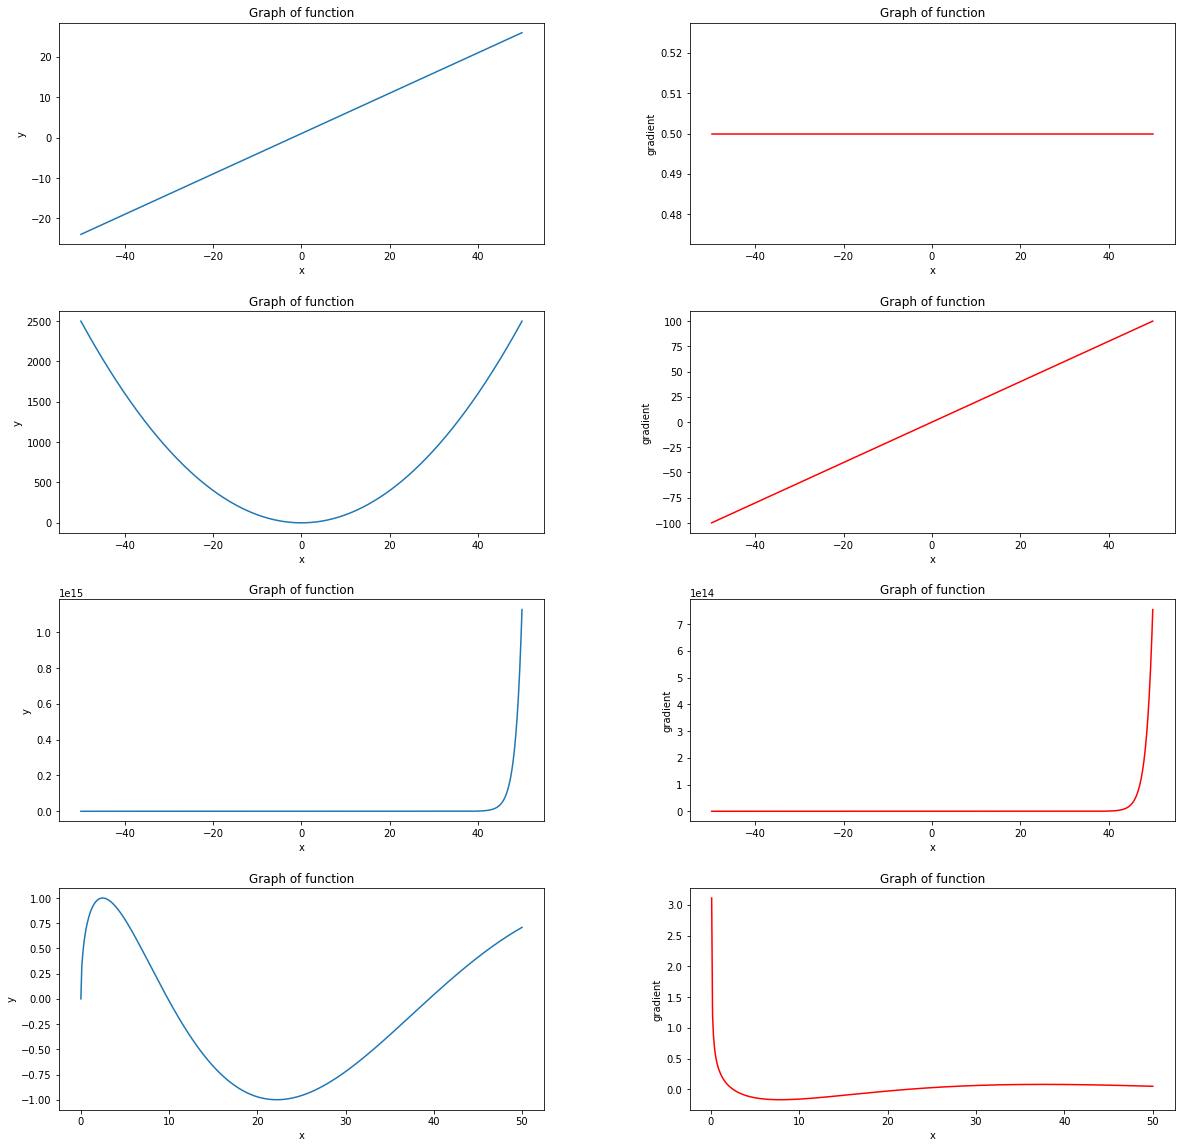

In [6]:
# 傾きを求める関数
def compute_gradient(function, x_range=(-50, 50.1, 0.1)):
    array_x = np.arange(x_range[0], x_range[1], x_range[2], dtype=float)
    array_y = function
    array_xy = np.concatenate([array_x[:, np.newaxis], array_y[:, np.newaxis]], axis=1)
    gradient = (array_y[1:] - array_y[:-1]) / (array_x[1:] - array_x[:-1])
    return array_xy, gradient

def function1(array_x):
    array_y = 0.5 * array_x +1
    return array_y

def function2(array_x):
    array_y = array_x**2
    return array_y

def function3(array_x):
    array_y = (2*array_x**2) + 2**array_x
    return array_y

def function4(array_x):
    array_y = np.sin(array_x ** 0.5)
    return array_y

step = 0.1
array_x1 = np.arange(-50, 50+step, step, dtype=float)
array_x2 = np.arange(0, 50+step, step, dtype=float)

array_xy1, gradient1 = compute_gradient(function1(array_x1))
array_xy2, gradient2 = compute_gradient(function2(array_x1))
array_xy3, gradient3 = compute_gradient(function3(array_x1))
array_xy4, gradient4 = compute_gradient(function4(array_x2), (0, 50+step, step))


plt.figure(figsize=(20,20))
plt.subplots_adjust(wspace=0.3, hspace=0.3)

plt.subplot(4, 2, 1)
plt.title("Graph of function")
plt.xlabel("x")
plt.ylabel("y")
plt.plot(array_xy1[:, 0], array_xy1[:, 1])

plt.subplot(4, 2, 2)
plt.title("Graph of function")
plt.xlabel("x")
plt.ylabel("gradient")
plt.plot(array_xy1[1:, 0], gradient1, color="r")


plt.subplot(4, 2, 3)
plt.title("Graph of function")
plt.xlabel("x")
plt.ylabel("y")
plt.plot(array_xy2[:, 0], array_xy2[:, 1])

plt.subplot(4, 2, 4)
plt.title("Graph of function")
plt.xlabel("x")
plt.ylabel("gradient")
plt.plot(array_xy2[1:, 0], gradient2, color="r")

plt.subplot(4, 2, 5)
plt.title("Graph of function")
plt.xlabel("x")
plt.ylabel("y")
plt.plot(array_xy3[:, 0], array_xy3[:, 1])

plt.subplot(4, 2, 6)
plt.title("Graph of function")
plt.xlabel("x")
plt.ylabel("gradient")
plt.plot(array_xy3[1:, 0], gradient3, color="r")

plt.subplot(4, 2, 7)
plt.title("Graph of function")
plt.xlabel("x")
plt.ylabel("y")
plt.plot(array_xy4[:, 0], array_xy4[:, 1])

plt.subplot(4, 2, 8)
plt.title("Graph of function")
plt.xlabel("x")
plt.ylabel("gradient")
plt.plot(array_xy4[1:, 0], gradient4, color="r")


plt.show()


＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿
### 【問題6】最小値を求める
問題5で扱った関数のyの最小値を求めます。xの範囲も問題5と同様とします。

今回は勾配降下法ではなく、ndarrayのminメソッド、argminメソッドを用いてください。minメソッドは最小値を、argminメソッドは最小値のインデックスを取得することができます。

また、最小のyをとる前後の勾配を表示してください。

numpy.ndarray.min — NumPy v1.16 Manual

numpy.ndarray.argmin — NumPy v1.16 Manual

y1の最小値は -24.0 である。
その時の x の値は -50.0 である。
y2の最小値は 0.0 である。
その時の x の値は 0.0 である。
y3の最小値は 0.951 である。
その時の x の値は -0.2 である。
y4の最小値は -1.0 である。
その時の x の値は 22.2 である。


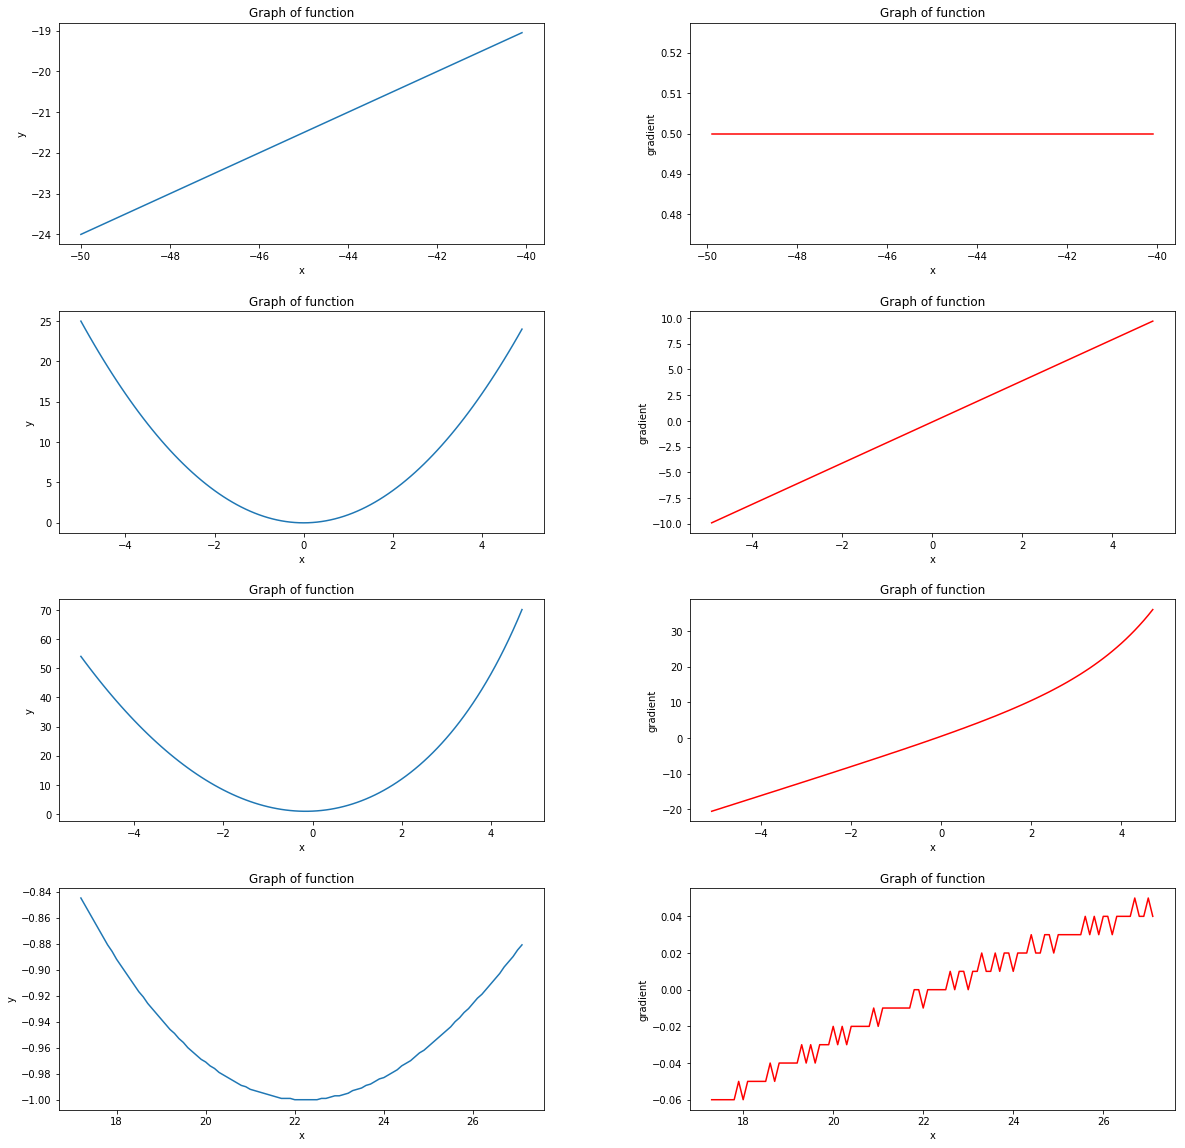

In [7]:
# 問題5の関数の最小値を求める関数
def compute_min_y(array_xy):
    min_y = array_xy[:, 1].min(0) # yの最小値を求める
    argmin_y = array_xy[:, 1].argmin(0) # yが最小値を取るときのndarrayのインデックスを取得
    #grad_min_y = np.empty((11, 1), dtype=float)
    
    # 最小値を含め前後の数値(100個)をスライシングして求める
    # 最小値の前に要素が100個ない場合は最初のインデックスから100塙目までを取得
    if argmin_y < 100:
        min_array_xy = np.around(array_xy[:100, :], decimals=3) # 最小値を含め初めから50番目までの要素をスライシング
        min_grad_xy = np.around((min_array_xy[1:, 1] - min_array_xy[:-1, 1]) / (min_array_xy[1:, 0] - min_array_xy[:-1, 0]), decimals=3)
        # それに対応する傾きも取得
        return min_array_xy, min_grad_xy 
    
    # 最小値の後ろに要素が100個ない場合は最後から100番目以降のインデックスを取得
    elif argmin_y > len(array_xy)-100:
        min_array_xy = np.around(array_xy[-100:, :], decimals=3) # 最小値を含め後ろから50塙目以降のインデックスを取得
        min_grad_xy = np.around((min_array_xy[1:, 1] - min_array_xy[:-1, 1]) / (min_array_xy[1:, 0] - min_array_xy[:-1, 0]), decimals=3)
        # それに対応する傾きも取得
        return min_array_xy, min_grad_xy 
    
    # それ以外の場合は最小値の前後50個ずつのインデックスを取得
    else:
        min_array_xy = np.around(array_xy[argmin_y-50:argmin_y+50, :], decimals=3)
        min_grad_xy = np.around((min_array_xy[1:, 1] - min_array_xy[:-1, 1]) / (min_array_xy[1:, 0] - min_array_xy[:-1, 0]), decimals=3)
        return min_array_xy, min_grad_xy


min_array_xy1, min_array_grad1 = compute_min_y(array_xy1)
min_array_xy2, min_array_grad2 = compute_min_y(array_xy2)
min_array_xy3, min_array_grad3 = compute_min_y(array_xy3)
min_array_xy4, min_array_grad4 = compute_min_y(array_xy4)


"""
# 各関数の要素数が100取得できているか確認
print(len(min_array_xy1))
print(len(min_array_grad1))
print(len(min_array_xy2))
print(len(min_array_grad2))
print(len(min_array_xy3))
print(len(min_array_grad3))
print(len(min_array_xy4))
print(len(min_array_grad4))

# 最小値が右端に来た場合に要素数が100個取得できるか確認
def function5(array_x):
    array_y = -1 * array_x
    return array_y

array_xy5, gradient5 = compute_gradient(function5(array_x1))
min_array_xy5, min_array_grad5 = compute_min_y(array_xy5)
#print(array_xy5)
#print(compute_min_y(array_xy5))

print(len(min_array_xy5))
print(len(min_array_grad5))
"""

# 各関数のyの最小値(及びその時のxの値を求める)
min_y1 = array_xy1[:, 1].min(0)
argmin_y1 = array_xy1[:, 1].argmin(0)
print("y1の最小値は {} である。".format(np.around(min_y1, decimals=3)))
print("その時の x の値は {} である。".format(np.around(array_xy1[argmin_y1, 0], decimals=3)))

min_y2 =  array_xy2[:, 1].min(0)
argmin_y2 = array_xy2[:, 1].argmin(0)
print("y2の最小値は {} である。".format(np.around(min_y2, decimals=3)))
print("その時の x の値は {} である。".format(np.around(array_xy2[argmin_y2, 0], decimals=3)))

min_y3 =  array_xy3[:, 1].min(0)
argmin_y3 = array_xy3[:, 1].argmin(0)
print("y3の最小値は {} である。".format(np.around(min_y3, decimals=3)))
print("その時の x の値は {} である。".format(np.around(array_xy3[argmin_y3, 0], decimals=3)))

min_y4 = array_xy4[:, 1].min(0)
argmin_y4 = array_xy4[:, 1].argmin(0)
print("y4の最小値は {} である。".format(np.around(min_y4, decimals=3)))
print("その時の x の値は {} である。".format(np.around(array_xy4[argmin_y4, 0], decimals=3)))


# 最小値前後100個の要素のグラフを描画
plt.figure(figsize=(20,20))
plt.subplots_adjust(wspace=0.3, hspace=0.3)

plt.subplot(4, 2, 1)
plt.title("Graph of function")
plt.xlabel("x")
plt.ylabel("y")
plt.plot(min_array_xy1[:, 0], min_array_xy1[:, 1])

plt.subplot(4, 2, 2)
plt.title("Graph of function")
plt.xlabel("x")
plt.ylabel("gradient")
plt.plot(min_array_xy1[1:, 0], min_array_grad1, color="r")


plt.subplot(4, 2, 3)
plt.title("Graph of function")
plt.xlabel("x")
plt.ylabel("y")
plt.plot(min_array_xy2[:, 0], min_array_xy2[:, 1])

plt.subplot(4, 2, 4)
plt.title("Graph of function")
plt.xlabel("x")
plt.ylabel("gradient")
plt.plot(min_array_xy2[1:, 0], min_array_grad2, color="r")

plt.subplot(4, 2, 5)
plt.title("Graph of function")
plt.xlabel("x")
plt.ylabel("y")
plt.plot(min_array_xy3[:, 0], min_array_xy3[:, 1])

plt.subplot(4, 2, 6)
plt.title("Graph of function")
plt.xlabel("x")
plt.ylabel("gradient")
plt.plot(min_array_xy3[1:, 0], min_array_grad3, color="r")

plt.subplot(4, 2, 7)
plt.title("Graph of function")
plt.xlabel("x")
plt.ylabel("y")
plt.plot(min_array_xy4[:, 0], min_array_xy4[:, 1])

plt.subplot(4, 2, 8)
plt.title("Graph of function")
plt.xlabel("x")
plt.ylabel("gradient")
plt.plot(min_array_xy4[1:, 0], min_array_grad4, color="r")


plt.show()
